取得套件，並使用非線性核來計算 (rbf)

In [29]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

取得訓練資料，使用train(|dbeta| > 0.35)

In [30]:
normalized_train = pd.read_csv('../result/all_beta_normalized_train_035.csv')
# print(normalized_train.head(1))
normalized_test = pd.read_csv('../result/all_beta_normalized_test_035.csv')

normalized_train_c = normalized_train[normalized_train['Unnamed: 0'].isin(normalized_test['Unnamed: 0'])]

將重複的資料去除，並且添加為每一個人的特徵值，ex，每個人有三個基因位點，代表一個人會有三個特徵

In [31]:
X_train = normalized_train_c.iloc[:, 1::2]

x = []

for i in range(445):
    X = X_train.iloc[:, i]

    X = X.values.flatten().tolist()

    x.append(X)

y = [ (0 if i < 47 else 1)  for i in range(445)]



將資料以訓練集20%，測試集80%切分 

In [32]:

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

clf=svm.SVC(kernel='rbf',C=1,gamma='auto')

clf.fit(X_train,y_train)

result = clf.predict(X_test)

print(clf.score(X_train,y_train)) 
print(clf.score(X_test, y_test))

0.9915730337078652
0.9775280898876404


選取偏好使用的位點 (以Wang方法分出的距離矩陣)，然後再根據數狀圖的群，針對三個群個挑選排名最靠前的一個基因
(可以配合三維圖去查看整體normal 與 tumor 的受測者分布)
剩下與all的相同

In [33]:

d1_values = normalized_train.loc[normalized_train['Unnamed: 0'] == 'cg00764217']
d2_values = normalized_train.loc[normalized_train['Unnamed: 0'] == 'cg00735923']
d3_values = normalized_train.loc[normalized_train['Unnamed: 0'] == 'cg06714480']
#原為 cg00764217 cg14777768 cg24604013

print(d1_values,d2_values,d3_values)

d1 = d1_values.iloc[:, 1::2]
d2 = d2_values.iloc[:, 1::2]
d3 = d3_values.iloc[:, 1::2]

d1 = d1.values.flatten().tolist()
d2 = d2.values.flatten().tolist()
d3 = d3.values.flatten().tolist()



     Unnamed: 0         1         2         3         4         5         6  \
250  cg00764217  0.227002  0.227002  0.091372  0.091372  0.235333  0.235333   

            7         8         9  ...       881       882       883  \
250  0.274485  0.274485  0.160645  ...  0.883745  0.883745  0.819094   

          884       885       886       887       888       889       890  
250  0.819094  0.824041  0.824041  0.862495  0.862495  0.789953  0.789953  

[1 rows x 891 columns]      Unnamed: 0         1         2         3         4         5         6  \
249  cg00735923  0.054159  0.054159  0.055514  0.055514  0.148628  0.148628   

            7         8         9  ...       881       882       883  \
249  0.167621  0.167621  0.067007  ...  0.834218  0.834218  0.694519   

          884       885       886       887       888       889       890  
249  0.694519  0.803105  0.803105  0.837209  0.837209  0.278736  0.278736  

[1 rows x 891 columns]      Unnamed: 0         1         2     

In [41]:
x = []

for i in range(445):
    x.append([d1[i],d2[i],d3[i]])
    
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

clf=svm.SVC(kernel='rbf',C=1,gamma='auto')

clf.fit(X_train,y_train)

result = clf.predict(X_test)

print(clf.score(X_train,y_train)) 
print(clf.score(X_test, y_test))

0.9101123595505618
0.8904494382022472


畫出三維空間圖(三個特徵)

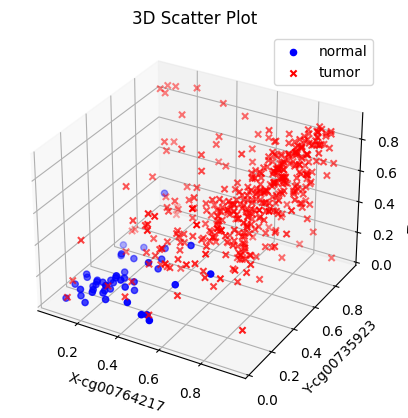

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 繪製 x-y 圖
ax.scatter(d1[:47], d2[:47],d3[:47], marker='o', color='blue', label='normal')
ax.scatter(d1[47:], d2[47:],d3[47:], marker='x',  color='red', label='tumor')

# 添加標題和軸標籤
ax.set_title('3D Scatter Plot')
ax.set_xlabel('X-cg00764217')
ax.set_ylabel('Y-cg00735923')
ax.set_zlabel('Z-cg06714480')

# 添加圖例
ax.legend()

# 顯示圖形
plt.show()

#可能要用.py去跑程式碼，這樣產生出來的圖才可以移動